In [2]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64
from io import BytesIO
from scipy.stats import ttest_ind
import os

In [5]:
"""Example signifincance and statistical tests calculations within groups. First is how to do the tests and add significance statements
the if statement is for applying it to a graph in a function. """

_available_tests = {
    "mann-whitney-u": stats.mannwhitneyu,
    "wilcoxon": stats.wilcoxon,
    "paired_t": stats.ttest_rel,
}
#If you cannot tell this is where I have spent the least time so far in coding...

def get_significance_text(series1, series2, test="mann-whitney-u", bonferroni_correction=1, show_ns=False, 
                          cutoff_dict={"*":0.05, "**":0.01, "***":0.001, "****": 0.00099}, return_string="{text}\n{pvalue:.4f}"):
    statistic, pvalue = _available_tests[test](series1, series2)
    levels, cutoffs = np.vstack(list(cutoff_dict.items())).T
    levels = np.insert(levels, 0, "n.s." if show_ns else "")
    text = levels[(pvalue < cutoffs.astype(float)).sum()]
    return return_string.format(pvalue=pvalue, text=text)

def add_significance_bar_to_axis(ax, series1, series2, center_x, line_width):
    significance_text = get_significance_text(series1, series2, show_ns=True)
    
    original_limits = ax.get_ylim()
    
    ax.errorbar(center_x, original_limits[1], xerr=line_width/2, color="k", capsize=4)
    ax.text(center_x, original_limits[1], significance_text, ha="center", va="bottom")
    
    extended_limits = (original_limits[0], (original_limits[1] - original_limits[0]) * 1.2 + original_limits[0])
    ax.set_ylim(extended_limits)
    
    return ax

def plot_this_graph(data_frame, conditions, group_order, significance_check = True):
    if significance_check:
        sub_checks = [significance_check] if not any(isinstance(element, list) for element in significance_check) else significance_check
        for sub_check in sub_checks:
            add_significance_bar_to_axis(ax, 
                                 grouped_df[grouped_df["group"] == sub_check[0]][feature], 
                                 grouped_df[grouped_df["group"] == sub_check[1]][feature],
                                (tick_positions[sub_check[0]] + tick_positions[sub_check[1]]) / 2,
                                 abs(tick_positions[sub_check[0]] - tick_positions[sub_check[1]]))

NameError: name 'stats' is not defined

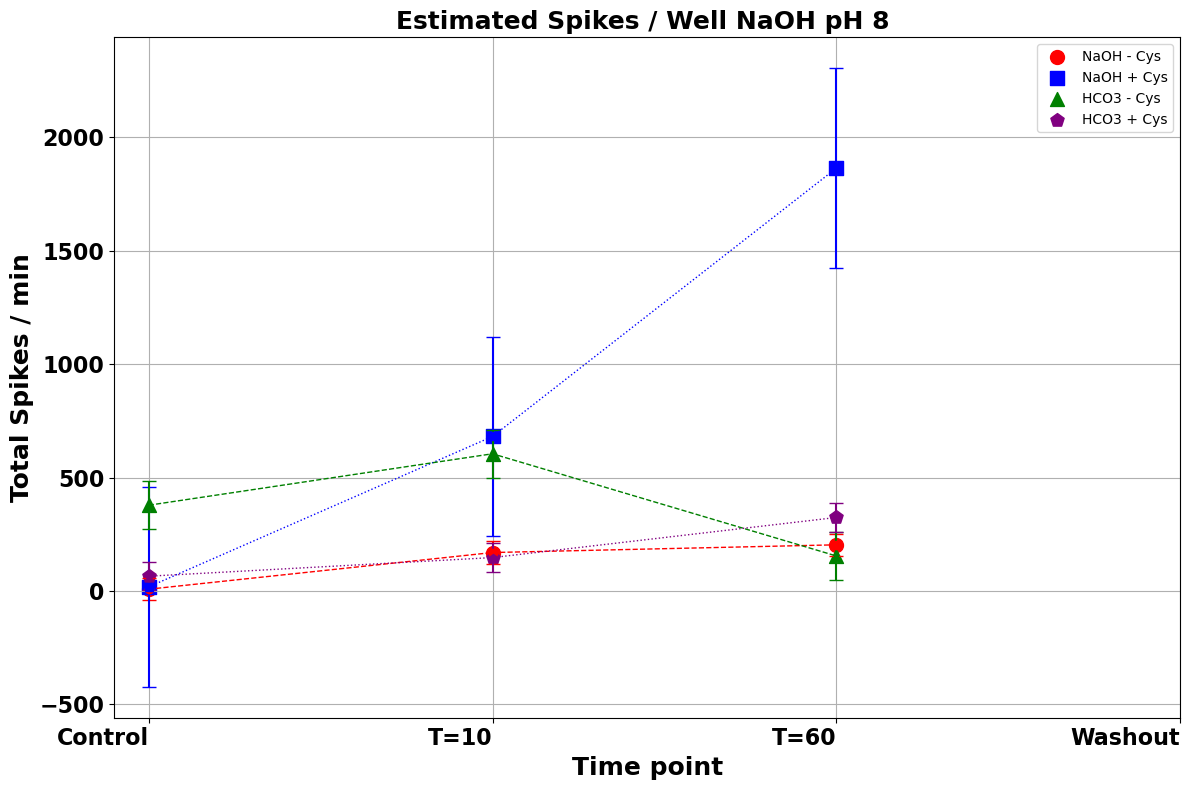

In [8]:
#Tryout 1 for new graph Est. Spikes (like Paul wants it to be) -> DO NOT use have better one
data1 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\pre_image\pre image NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well001_prediction.csv')
data2 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\pre_image\pre image NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well005_prediction.csv')
data3 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\pre_image\pre image NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well009_prediction.csv')
data4 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\start\experiment start NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well001_prediction.csv')
data5 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\start\experiment start NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well005_prediction.csv')
data6 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\start\experiment start NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well009_prediction.csv')
data7 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\end\experiment end NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_end_well001_prediction.csv')
data8 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\end\experiment end NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_end_well005_prediction.csv')
data9 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\end\experiment end NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_end_well009_prediction.csv')
data10 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\washout\washout NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well001_prediction.csv')
data11 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\washout\washout NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well005_prediction.csv')
data12 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\washout\washout NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well009_prediction.csv')

def process_data(data):
    combined_values = []
    values_by_condition = {'NaOH - Cys': [], 'NaOH + Cys': [], 'HCO3 - Cys': [], 'HCO3 + Cys': []}

    for i, df in enumerate(data):
        average_row_sum = df.sum(axis=1).mean() #calculate sum of rows
        total_column_sum = df.sum(axis=0).sum() #calculate total column sum
        combined_value = (average_row_sum + total_column_sum) / 2 #combine values of row and column sum
        combined_values.append(combined_value)

        if i < 3:
            condition = 'NaOH - Cys'
        elif i < 6:
            condition = 'NaOH + Cys'
        elif i < 9:
            condition = 'HCO3 - Cys'
        else:
            condition = 'HCO3 + Cys'

        values_by_condition[condition].append(combined_value)

    return combined_values, values_by_condition

data_frames = [data1, data2, data3, data4, data5, data6, data7, data8,
               data9, data10, data11, data12]

combined_values, values_by_condition = process_data(data_frames)

# Define markers for each condition for visual distinction
markers = {'NaOH - Cys': 'o', 'NaOH + Cys': 's', 'HCO3 - Cys': '^', 'HCO3 + Cys': 'p'}
colors = {'NaOH - Cys': 'red', 'NaOH + Cys': 'blue', 'HCO3 - Cys': 'green', 'HCO3 + Cys': 'purple'}

# Group positions setup
group_spacing = 1.0 # Space between groups of the same condition
condition_offset = 0  # Space between different conditions
group_positions = {}  # To hold the x positions for each condition group

num_conditions = len(values_by_condition)
condition_keys = list(values_by_condition.keys())

# Assign x positions for each condition's data points
for i, condition in enumerate(condition_keys):
    group_positions[condition] = [i * condition_offset + group_spacing * j for j in range(len(values_by_condition[condition]))]

# Create the plot
plt.figure(figsize=(12, 8))

errors = {condition: np.std(values) / np.sqrt(len(values)) for condition, values in values_by_condition.items()}
for condition, values in values_by_condition.items():
    x_positions = group_positions[condition]
    y_values = values
    y_errors = errors[condition]
    plt.errorbar(x_positions, y_values, yerr=y_errors, fmt=markers[condition], color=colors[condition], capsize=5)

for condition, values in values_by_condition.items():
    x_positions = group_positions[condition]
    plt.scatter(x_positions, values, marker=markers[condition], color=colors[condition], label=condition, s=100)

# Customizing the plot
custom_labels = ['Control', 'T=10', 'T=60', 'Washout']
positions = [0, 1, 2, 3]

x_positions = group_positions['NaOH - Cys']
y_values = values_by_condition['NaOH - Cys']
plt.plot(x_positions, y_values, linestyle='--', color='red', linewidth=1)
x_positions = group_positions['NaOH + Cys']
y_values = values_by_condition['NaOH + Cys']
plt.plot(x_positions, y_values, linestyle=':', color='blue', linewidth=1)
x_positions = group_positions['HCO3 - Cys']
y_values = values_by_condition['HCO3 - Cys']
plt.plot(x_positions, y_values, linestyle='--', color='green', linewidth=1)
x_positions = group_positions['HCO3 + Cys']
y_values = values_by_condition['HCO3 + Cys']
plt.plot(x_positions, y_values, linestyle=':', color='purple', linewidth=1)


plt.title('Estimated Spikes / Well NaOH pH 8 ', fontweight='bold', fontsize=18)
plt.xlabel('Time point', fontweight='bold', fontsize=18)
plt.ylabel('Total Spikes / min', fontweight='bold', fontsize=18)
#plt.xticks([value for position in group_positions.values() for value in position], 
           #[f'{cond} {idx+1}' for cond in condition_keys for idx in range(len(values_by_condition[cond]))], 
           #rotation=45, ha="right", fontsize=12)
plt.xticks(positions, custom_labels, ha="right", fontsize=16, fontweight='bold')
plt.yticks(fontweight='bold', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


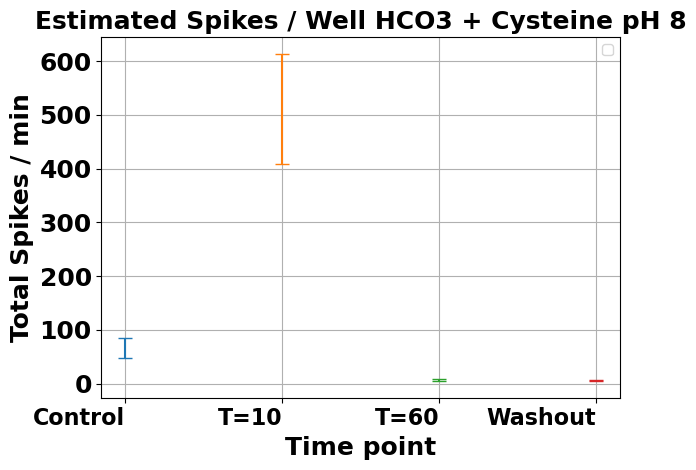

Control
[24.501915916787762, 66.58193421663637, 86.98496024365264]
T=10
[661.9363961114906, 308.9415447306256, 511.4019516944876]
T=60
[6.604958944129577, 10.561511310973126, 6.2638511491738855]
Washout
[4.976016566902953, 9.487504278037807, 5.824418738796717]


In [135]:
#New Graph for Est. Spikes  -> DO NOT use, have better one

'''GET DATA FILES'''
data1 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\pre_image\pre image HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well004_prediction.csv')
data2 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\pre_image\pre image HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well008_prediction.csv')
data3 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\pre_image\pre image HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well012_prediction.csv')

data4 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\start\experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well004_prediction.csv')
data5 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\start\experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well008_prediction.csv')
data6 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\start\experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well012_prediction.csv')

data7 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\end\experiment end HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_end_well004_prediction.csv')
data8 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\end\experiment end HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_end_well008_prediction.csv')
data9 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\end\experiment end HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_end_well012_prediction.csv')

data10 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\washout\washout HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well004_prediction.csv')
data11 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\washout\washout HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well008_prediction.csv')
data12 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\washout\washout HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well012_prediction.csv')

def process_data(data):
    combined_values = []
    values_by_condition = {'Control': [], 'T=10': [], 'T=60': [], 'Washout': []} #set variables from experiment

'''CALCULATE AV ROW SUM AND TOTAL COLUMN SUM; COMBINE VALUES - set conditions'''
    for i, df in enumerate(data):
        average_row_sum = df.sum(axis=1).mean() #calculate average row sum
        total_column_sum = df.sum(axis=0).sum() #calculate total column sum
        combined_value = (average_row_sum + total_column_sum) / 2
        combined_values.append(combined_value) #assign conditions to dataframe
        if i < 3:
            condition = 'Control'
        elif i < 6:
            condition = 'T=10'
        elif i < 9:
            condition = 'T=60'
        else:
            condition = 'Washout'
 # Append the combined value to the values_by_condition dictionary, indexed by the condition
        values_by_condition[condition].append(combined_value)
    return combined_values, values_by_condition

#create dataframes
data_frames = [data1, data2, data3, data4, data5, data6, data7, data8,
               data9, data10, data11, data12]

combined_values, values_by_condition = process_data(data_frames)

# Define markers for each condition for visual distinction/plotting
markers = {'NaOH - Cys': 'o', 'NaOH + Cys': 's', 'HCO3 - Cys': '^', 'HCO3 + Cys': 'p'} 
colors = {'NaOH - Cys': 'red', 'NaOH + Cys': 'blue', 'HCO3 - Cys': 'green', 'HCO3 + Cys': 'purple'} 
import scipy.stats as stat

#set x positions for each condition
x_positions = {
    'Control': [0] * len(values_by_condition['Control']),
    'T=10': [1] * len(values_by_condition['T=10']),
    'T=60': [2] * len(values_by_condition['T=60']),
    'Washout': [3] * len(values_by_condition['Washout'])}

#calculate sem and errorbars for later plotting
for condition, values in values_by_condition.items():
    x_positions_condition = x_positions[condition]
    y_values = values
    median = np.median(values) #calculate median
    sem = stat.sem(values) #calculate sem

    plt.errorbar(np.median(x_positions_condition), median, yerr=sem, capsize=5) #fmt=markers[condition], color=colors[condition], label=condition,

# Customizing the plot, set x label position
custom_labels = ['Control', 'T=10', 'T=60', 'Washout']
positions = [0, 1, 2, 3]

plt.title('Estimated Spikes / Well HCO3 + Cysteine pH 8', fontweight='bold', fontsize=18)
plt.xlabel('Time point', fontweight='bold', fontsize=18)
plt.ylabel('Total Spikes / min', fontweight='bold', fontsize=18)
#plt.xticks([value for position in group_positions.values() for value in position], 
           #[f'{cond} {idx+1}' for cond in condition_keys for idx in range(len(values_by_condition[cond]))], 
           #rotation=45, ha="right", fontsize=12)
plt.xticks(positions, custom_labels, ha="right", fontsize=16, fontweight='bold')
plt.yticks(fontweight='bold', fontsize=18)
plt.legend()
#plt.ylim([0, 1200])
plt.grid(True)
plt.tight_layout()
plt.show()
for value, condition in (values_by_condition.items()):
    print(value)
    print(condition)

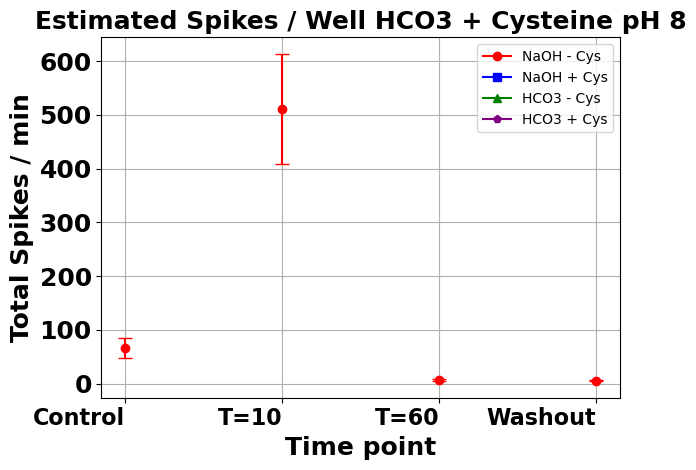

Control
[24.501915916787762, 66.58193421663637, 86.98496024365264]
T=10
[661.9363961114906, 308.9415447306256, 511.4019516944876]
T=60
[6.604958944129577, 10.561511310973126, 6.2638511491738855]
Washout
[4.976016566902953, 9.487504278037807, 5.824418738796717]


In [155]:
##### new code for new graph (what Paul wants) for Est. Spikes -> Best one
data1 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\pre_image\pre image HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well004_prediction.csv')
data2 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\pre_image\pre image HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well008_prediction.csv')
data3 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\pre_image\pre image HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well012_prediction.csv')

data4 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\start\experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well004_prediction.csv')
data5 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\start\experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well008_prediction.csv')
data6 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\start\experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well012_prediction.csv')

data7 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\end\experiment end HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_end_well004_prediction.csv')
data8 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\end\experiment end HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_end_well008_prediction.csv')
data9 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\end\experiment end HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_end_well012_prediction.csv')

data10 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\washout\washout HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well004_prediction.csv')
data11 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\washout\washout HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well008_prediction.csv')
data12 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\washout\washout HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well012_prediction.csv')

def process_data(data):
    combined_values = []
    values_by_condition = {'Control': [], 'T=10': [], 'T=60': [], 'Washout': []}

    for i, df in enumerate(data):
        average_row_sum = df.sum(axis=1).mean() #calculate average sum of rows
        total_column_sum = df.sum(axis=0).sum() #calculate total sum all columns
        combined_value = (average_row_sum + total_column_sum) / 2
        combined_values.append(combined_value)
        if i < 3:
            condition = 'Control'
        elif i < 6:
            condition = 'T=10'
        elif i < 9:
            condition = 'T=60'
        else:
            condition = 'Washout'
# Append the combined value to the values_by_condition dictionary, indexed by the condition
        values_by_condition[condition].append(combined_value)
    return combined_values, values_by_condition

data_frames = [data1, data2, data3, data4, data5, data6, data7, data8,
               data9, data10, data11, data12]

combined_values, values_by_condition = process_data(data_frames)

# Define markers for each condition for visual distinction
markers = {'Control': 'o', 'T=60': 'o', 'T=10': 'o', 'Washout': 'o'} 
colors = {'Control': 'red', 'T=60': 'red', 'T=10': 'red', 'Washout': 'red'}

markers_samples = {'NaOH - Cys': 'o', 'NaOH + Cys': 's', 'HCO3 - Cys': '^', 'HCO3 + Cys': 'p'} 
colors_samples = {'NaOH - Cys': 'red', 'NaOH + Cys': 'blue', 'HCO3 - Cys': 'green', 'HCO3 + Cys': 'purple'} 

import scipy.stats as stat
#set x axis positions for each condition
x_positions = {
    'Control': [0] * len(values_by_condition['Control']),
    'T=10': [1] * len(values_by_condition['T=10']),
    'T=60': [2] * len(values_by_condition['T=60']),
    'Washout': [3] * len(values_by_condition['Washout'])
}

#Loop over each condition and its corresponding values in the values_by_condition dictionary
for condition, values in values_by_condition.items():
    x_positions_condition = x_positions[condition] #get x positios for condition
    y_values = values
    median = np.median(values) #calculate median
    sem = stat.sem(values) #calculate sem
    plt.errorbar(np.median(x_positions_condition), median, yerr=sem, capsize=5, fmt=markers[condition], color=colors[condition], label=condition)

#for condition, values in values_by_condition2.items():
    #x_positions_condition = x_positions[condition]
    #y_values = values
    #median = np.median(values)
    #sem = stat.sem(values)
    #plt.errorbar(np.median(x_positions_condition) + 0.2, median, yerr=sem, capsize=5, fmt=markers_samples[condition], color=colors_samples[condition], label=condition)

#Customizing the plot
custom_labels = ['Control', 'T=10', 'T=60', 'Washout']
positions = [0, 1, 2, 3]

plt.title('Estimated Spikes / Well HCO3 + Cysteine pH 8', fontweight='bold', fontsize=18)
plt.xlabel('Time point', fontweight='bold', fontsize=18)
plt.ylabel('Total Spikes / min', fontweight='bold', fontsize=18)
plt.xticks(positions, custom_labels, ha="right", fontsize=16, fontweight='bold')
plt.yticks(fontweight='bold', fontsize=18)
from matplotlib.lines import Line2D
legend_lines = [Line2D([0], [0], marker=markers_samples[sample], color=colors_samples[sample], label=sample) for sample in markers_samples]
plt.legend(handles=legend_lines, loc='upper right')
#plt.ylim([0, 1200])
plt.grid(True)
plt.tight_layout()
plt.show()
for value, condition in (values_by_condition.items()):
    print(value)
    print(condition)

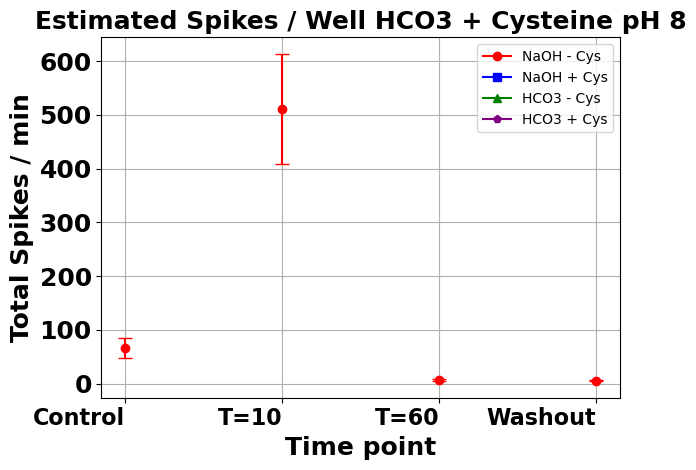

Control
[24.501915916787762, 66.58193421663637, 86.98496024365264]
T=10
[661.9363961114906, 308.9415447306256, 511.4019516944876]
T=60
[6.604958944129577, 10.561511310973126, 6.2638511491738855]
Washout
[4.976016566902953, 9.487504278037807, 5.824418738796717]


In [156]:
# new code for final graph Est. Spikes --- same as above???
data1 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\pre_image\pre image HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well004_prediction.csv')
data2 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\pre_image\pre image HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well008_prediction.csv')
data3 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\pre_image\pre image HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well012_prediction.csv')

data4 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\start\experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well004_prediction.csv')
data5 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\start\experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well008_prediction.csv')
data6 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\start\experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well012_prediction.csv')

data7 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\end\experiment end HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_end_well004_prediction.csv')
data8 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\end\experiment end HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_end_well008_prediction.csv')
data9 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\end\experiment end HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_end_well012_prediction.csv')

data10 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\washout\washout HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well004_prediction.csv')
data11 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\washout\washout HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well008_prediction.csv')
data12 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files\washout\washout HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well012_prediction.csv')


def process_data(data):
    combined_values = []
    values_by_condition = {'Control': [], 'T=10': [], 'T=60': [], 'Washout': []}

    for i, df in enumerate(data):
        average_row_sum = df.sum(axis=1).mean() #calculate average row sum
        total_column_sum = df.sum(axis=0).sum() #calculate total column sum
        combined_value = (average_row_sum + total_column_sum) / 2
        combined_values.append(combined_value)
        if i < 3:
            condition = 'Control'
        elif i < 6:
            condition = 'T=10'
        elif i < 9:
            condition = 'T=60'
        else:
            condition = 'Washout'
# Append the combined value to the values_by_condition dictionary, indexed by the condition
        values_by_condition[condition].append(combined_value)
    return combined_values, values_by_condition

data_frames = [data1, data2, data3, data4, data5, data6, data7, data8,
               data9, data10, data11, data12]

combined_values, values_by_condition = process_data(data_frames)

# Define markers for each condition for visual distinction
markers = {'Control': 'o', 'T=60': 'o', 'T=10': 'o', 'Washout': 'o'} 
colors = {'Control': 'red', 'T=60': 'red', 'T=10': 'red', 'Washout': 'red'}

markers_samples = {'NaOH - Cys': 'o', 'NaOH + Cys': 's', 'HCO3 - Cys': '^', 'HCO3 + Cys': 'p'} 
colors_samples = {'NaOH - Cys': 'red', 'NaOH + Cys': 'blue', 'HCO3 - Cys': 'green', 'HCO3 + Cys': 'purple'} 
import scipy.stats as stat
x_positions = {
    'Control': [0] * len(values_by_condition['Control']),
    'T=10': [1] * len(values_by_condition['T=10']),
    'T=60': [2] * len(values_by_condition['T=60']),
    'Washout': [3] * len(values_by_condition['Washout'])
}

for condition, values in values_by_condition.items():
    x_positions_condition = x_positions[condition]
    y_values = values
    median = np.median(values) #calculate median
    sem = stat.sem(values) #calculate sem
    plt.errorbar(np.median(x_positions_condition), median, yerr=sem, capsize=5, fmt=markers[condition], color=colors[condition], label=condition)

#for condition, values in values_by_condition2.items():
    #x_positions_condition = x_positions[condition]
    #y_values = values
    #median = np.median(values)
    #sem = stat.sem(values)
    #plt.errorbar(np.median(x_positions_condition) + 0.2, median, yerr=sem, capsize=5, fmt=markers_samples[condition], color=colors_samples[condition], label=condition)

# Customizing the plot
custom_labels = ['Control', 'T=10', 'T=60', 'Washout']
positions = [0, 1, 2, 3]

plt.title('Estimated Spikes / Well HCO3 + Cysteine pH 8', fontweight='bold', fontsize=18)
plt.xlabel('Time point', fontweight='bold', fontsize=18)
plt.ylabel('Total Spikes / min', fontweight='bold', fontsize=18)
plt.xticks(positions, custom_labels, ha="right", fontsize=16, fontweight='bold')
plt.yticks(fontweight='bold', fontsize=18)
from matplotlib.lines import Line2D
legend_lines = [Line2D([0], [0], marker=markers_samples[sample], color=colors_samples[sample], label=sample) for sample in markers_samples]
plt.legend(handles=legend_lines, loc='upper right')
#plt.ylim([0, 1200])
plt.grid(True)
plt.tight_layout()
plt.show()
for value, condition in (values_by_condition.items()):
    print(value)
    print(condition)

In [ ]:
# Perform a two-sample t-test to compare the means of two groups
def calculate_p_value(group1, group2):
    t_stat, p_val = ttest_ind(group1, group2)
    return p_val

# Calculate the p-value for the pair of conditions ('NaOH - Cys', 'NaOH + Cys')
condition1 = 'NaOH - Cys'
condition2 = 'NaOH + Cys'
p_value12 = calculate_p_value(values_by_condition[condition1], values_by_condition[condition2])

# Calculate the p-value for the pair of conditions ('HCO3 - Cys', 'HCO3 + Cys')
condition3 = 'HCO3 - Cys'
condition4 = 'HCO3 + Cys'
p_value34 = calculate_p_value(values_by_condition[condition3], values_by_condition[condition4])

# Print the p-values
print(f"p-value for {'-'.join(condition1.split(' ')[0:2])} vs {'+'.join(condition2.split(' ')[0:2])}: {p_value12:.3f}")
print(f"p-value for {'-'.join(condition3.split(' ')[0:2])} vs {'+'.join(condition4.split(' ')[0:2])}: {p_value34:.3f}")

# Add the p-values to the plot as text with the corresponding color
group_positions = []

x_position12 = sum(group_positions[condition1]) / len(group_positions[condition1]) + sum(group_positions[condition2]) / len(group_positions[condition2])
y_position12 = max(values_by_condition[condition1])
plt.text(x_position12, y_position12, f"p = {p_value12:.3f}", fontsize=10, fontweight='bold')

x_position34 = sum(group_positions[condition3]) / len(group_positions[condition3]) + sum(group_positions[condition4]) / len(group_positions[condition4])
y_position34 = max(values_by_condition[condition3])
plt.text(x_position34, y_position34, f"p = {p_value34:.3f}", fontsize=10, fontweight='bold')

In [3]:
#Estimated Total Spikes per Well boxplot graph -> final graphs 
#sum of rows and frames (sum all prediction values)

#create base dir and get file names
base_dir = r'C:\processing\charlotte HCO3 NaOH exp\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\bic_chronic'

file_names = [
    'predictions_deltaF_nb_nc_1.csv',
    'predictions_deltaF_nb_nc_2.csv',
    'predictions_deltaF_nb_nc_3.csv',
    'predictions_deltaF_nb_nc_4.csv',
    
    'predictions_deltaF_nb_c_1.csv',
    'predictions_deltaF_nb_c_2.csv',
    'predictions_deltaF_nb_c_3.csv',
    'predictions_deltaF_nb_c_4.csv',
    
    'predictions_deltaF_b_nc_1.csv',
    'predictions_deltaF_b_nc_2.csv',
    'predictions_deltaF_b_nc_3.csv',
    'predictions_deltaF_b_nc_4.csv',

    'predictions_deltaF_b_c_1.csv',
    'predictions_deltaF_b_c_2.csv',
    'predictions_deltaF_b_c_3.csv',
    'predictions_deltaF_b_c_4.csv'
]

def read_files(base_dir, file_names): #read csv files
    data = []
    for file_name in file_names:
        file_path = f"{base_dir}/{file_name}"
        df = pd.read_csv(file_path)
        data.append(df)
    return data

#processing data with av row sum and column sum and combine data for plotting
def process_data(data):
    combined_values = []
    conditions = []
    for i, df in enumerate(data):
        average_row_sum = df.sum(axis=1).mean() #calculate average row sum
        total_column_sum = df.sum(axis=0).sum() #calculate total column sum
        combined_value = (average_row_sum + total_column_sum) / 2
        combined_values.append(combined_value) #append combined values
        if i < 3: #for the first 3 files
            condition = 'NaOH - Cys.'
        elif i < 6: #for the next 3 files
            condition = 'NaOH + Cys.'
        elif i < 9: #for next 3 files
            condition = 'HCO3 - Cys.'
        else: #for all other files
            condition = 'HCO3 + Cys.'
        conditions.append(condition) #append set conditions
    return combined_values, conditions

print()

#create boxplot
def create_boxplot(combined_values, conditions):
    data = {'Condition': conditions, 'Value': combined_values}
    df = pd.DataFrame(data)
    
    sns.boxplot(x='Condition', y='Value', data=df, linewidth=2)
    sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True) #add individual datapoints
    means = df.groupby('Condition')['Value'].mean().reset_index() #add means
    plt.title('Estimated Spikes Total per Well T=60', fontweight='bold', fontsize=18)
    plt.xlabel('Condition', fontweight='bold', fontsize=18)
    plt.ylabel('Estimated Spikes / Well (min-1)', fontweight='bold', fontsize=18)
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().spines['left'].set_linewidth(2)
    plt.xticks(fontweight='bold', fontsize=12)
    plt.yticks( fontweight='bold', fontsize=18)
    plt.ylim([0, 8000])
    plt.show()

if __name__ == '__main__':
    data = read_files(base_dir, file_names)
    combined_values, conditions = process_data(data)
    create_boxplot(combined_values, conditions)

NameError: name 'pd' is not defined

In [165]:
#Average Estimated Spikes per cell (old) -> DO NOT use
# sum every row in Histogram! (Graph 2)

# Read the data from CSV files
data = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted/predictions_deltaF_5.csv')
data2 = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\predictions_deltaF_KCl_5.csv')

# Calculate the sum of each row for each DataFrame
row_sums_data = data.sum(axis=1)
row_sums_data2 = data2.sum(axis=1)

# Combine the row sums into a single DataFrame with appropriate labels
combined_data = pd.DataFrame({
    'Well 003': row_sums_data,
    'Well 007': row_sums_data2,
})

# Plotting the boxplot
plt.figure(figsize=(10, 6))
boxplot = combined_data.boxplot()

# Add scatter plot on top of boxplot for each set of data
for i, col in enumerate(combined_data.columns):
    y = combined_data[col]
    x = np.random.normal(i+1, 0.04, size=len(y))  # Add some jitter to the x-axis positions
    plt.scatter(x, y, alpha=0.6)
plt.title('AV Estimated Spikes per Cell pre_high_pH', fontweight='bold', fontsize=14)
plt.xlabel('Well', fontweight='bold', fontsize=14)
plt.ylabel('Estimated Spikes/ Cell (min-1)', fontweight='bold', fontsize=14)
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.ylim([0, 80])
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\zeiss\\Desktop\\rotation_stud\\prediction_df_csv_converted/predictions_deltaF_5.csv'

In [164]:
#Network ISF boxplot graph -> for final graphs

#create base directory and get file names
base_dir = r'C:\processing\charlotte HCO3 NaOH exp\240329 HCO vs NaOH Cys toxicity pH 7.2\prediction_files\Hibernate_baseline'

file_names = [
    'naoh_pre-240329_wtRt_DIV15_C1403_100k_bc_10x_HA_pre_well001_prediction.csv',
    'naoh_pre-240329_wtRt_DIV15_C1403_100k_bc_10x_HA_pre_well005_prediction.csv',
    'naoh_pre-240329_wtRt_DIV15_C1403_100k_bc_10x_HA_pre_well009_prediction.csv',
    
    'naoh_cys_pre-240329_wtRt_DIV15_C1403_100k_bc_10x_HA_pre_well002_prediction.csv',
    'naoh_cys_pre-240329_wtRt_DIV15_C1403_100k_bc_10x_HA_pre_well006_prediction.csv',
    'naoh_cys_pre-240329_wtRt_DIV15_C1403_100k_bc_10x_HA_pre_well010_prediction.csv',
    
    'hco3_pre-240329_wtRt_DIV15_C1403_100k_bc_10x_HA_pre_well004_prediction.csv',
    'hco3_pre-240329_wtRt_DIV15_C1403_100k_bc_10x_HA_pre_well008_prediction.csv',
    'hco3_pre-240329_wtRt_DIV15_C1403_100k_bc_10x_HA_pre_well012_prediction.csv',

    'hco3_cys_pre-240329_wtRt_DIV15_C1403_100k_bc_10x_HA_pre_well003_prediction.csv',
    'hco3_cys_pre-240329_wtRt_DIV15_C1403_100k_bc_10x_HA_pre_well007_prediction.csv',
    'hco3_cys_pre-240329_wtRt_DIV15_C1403_100k_bc_10x_HA_pre_well011_prediction.csv',
]

#create dataframe
def read_files(base_dir, file_names):
    data = []
    for file_name in file_names:
        file_path = os.path.join(base_dir, file_name)
        df = pd.read_csv(file_path)
        # Ensure the data is numeric
        df = df.apply(pd.to_numeric, errors='coerce')
        data.append(df)
    return data

def calculate_coefficient_of_variation(df):
    if not df.empty:
        # Calculate the coefficient of variation
        cv_values = df.std(axis=0, skipna=True) / df.mean(axis=0, skipna=True)
        # Check if cv_values is not empty
        if cv_values.notnull().any():
            return cv_values.mean()
        else:
            return np.nan
    else:
        return np.nan

#define conditions for files
def get_condition(file_name):
    if 'Cys' in file_name:
        if 'NaOH' in file_name:
            return 'NaOH + Cys'
        elif 'HCO3' in file_name:
            return 'HCO3 + Cys'
    else:
        if 'NaOH' in file_name:
            return 'NaOH'
        elif 'HCO3' in file_name:
            return 'HCO3'
#calculate CV
def process_data(data, file_names):
    results = []
    for df, file_name in zip(data, file_names):
        cv = calculate_coefficient_of_variation(df) #calclate CV
        condition = get_condition(file_name) #getting condition for all files
        results.append({'Condition': condition, 'CV': cv}) #append results
    return pd.DataFrame(results)

data = read_files(base_dir, file_names)
df_results = process_data(data, file_names)

#create boxplot
sns.boxplot(x='Condition', y='CV', data=df_results)
sns.stripplot(x='Condition', y='CV', data=df_results, color='black', size=8, jitter=True) #for individual datapoints
plt.title('N_ISF for pre ', fontweight='bold', fontsize=18)
plt.xlabel('Condition', fontweight='bold', fontsize=18)
plt.ylabel('CV', fontweight='bold', fontsize=15)
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.yticks(fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold', fontsize=16)
plt.ylim([0, 12])
plt.show()

ValueError: min() arg is an empty sequence

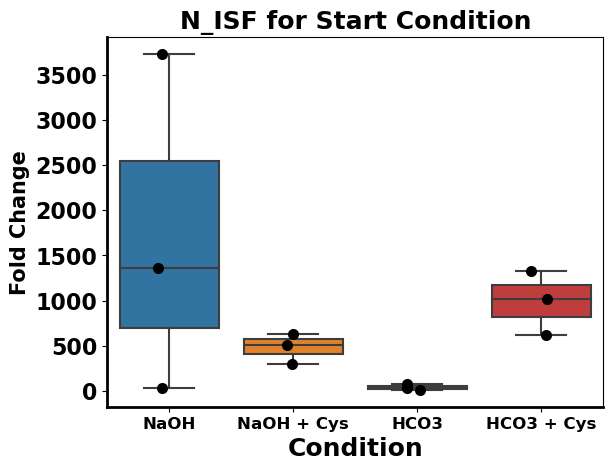

In [128]:
#Network ISF -> OLD Graph DO NOT use
#Boxplot with AV Estm. Spikes for each well per Sample (3 wells per sample = 3 data points) 
#should be one of the final graphs

#create base directory and get file names
base_dir = r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\start'

file_names = [
    'experiment start NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well001_prediction.csv',
    'experiment start NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well005_prediction.csv',
    'experiment start NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well009_prediction.csv',
    
    'experiment start NaOH Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well002_prediction.csv',
    'experiment start NaOH Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well006_prediction.csv',
    'experiment start NaOH Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well010_prediction.csv',
    
    'experiment start HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well003_prediction.csv',
    'experiment start HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well007_prediction.csv',
    'experiment start HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well011_prediction.csv',

    'experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well004_prediction.csv',
    'experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well008_prediction.csv',
    'experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well012_prediction.csv',
]

def read_files(base_dir, file_names):
    data = []
    for file_name in file_names:
        file_path = f"{base_dir}/{file_name}"
        df = pd.read_csv(file_path)
        data.append(df)
    return data

#calculate av row sum and total column sum
def calculate_file_average(df):
    average_row_sum = df.sum(axis=1).mean()
    total_column_sum = df.sum(axis=0).sum()
    return (average_row_sum + total_column_sum) / 2

#give every value a condition
def process_data(data, file_names):
    results = []
    for df, file_name in zip(data, file_names):
        average = calculate_file_average(df)
        condition = get_condition(file_name)
        results.append({'Condition': condition, 'Value': average})
    return pd.DataFrame(results)

#set conditions for each file
def get_condition(file_name):
    if 'Cys' in file_name:
        if 'NaOH' in file_name:
            return 'NaOH + Cys'
        elif 'HCO3' in file_name:
            return 'HCO3 + Cys'
    else:
        if 'NaOH' in file_name:
            return 'NaOH'
        elif 'HCO3' in file_name:
            return 'HCO3'
        
data = read_files(base_dir, file_names)
df_results = process_data(data, file_names)

#create plot
sns.boxplot(x='Condition', y='Value', data=df_results)
sns.stripplot(x='Condition', y='Value', data=df_results, color='black', size=8, jitter=True)
plt.title('N_ISF for Start Condition', fontweight='bold', fontsize=18)
plt.xlabel('Condition', fontweight='bold', fontsize=18)
plt.ylabel('Fold Change', fontweight='bold', fontsize=15)
#plt.ylim([0, 2])
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.yticks(fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold', fontsize=12)
plt.show()

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
594    0.0
595    0.0
596    0.0
597    0.0
598    0.0
Length: 599, dtype: float64


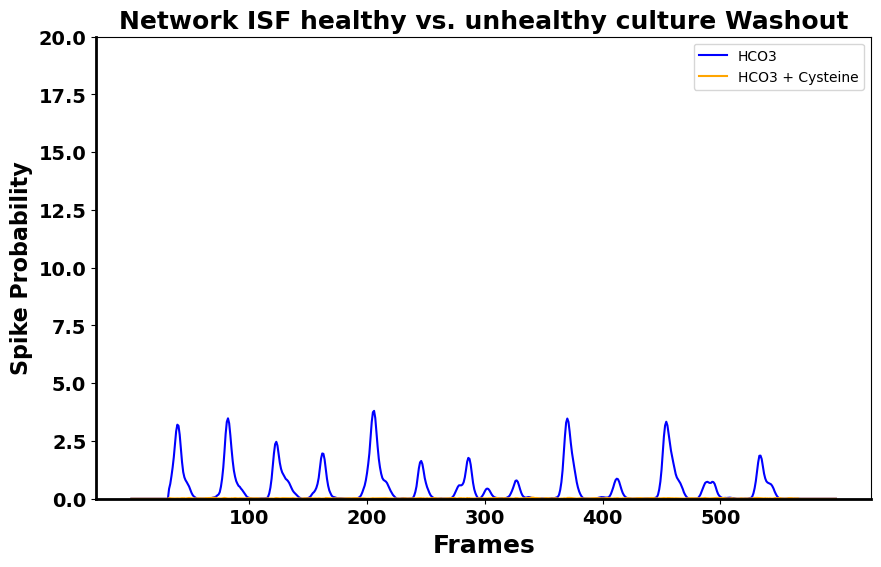

In [117]:
#healthy vs unhealthy culture, not for final graphs (just an overview)
# Calculate sum for each frame (per Well) and plotting it into NISF via T (frames)

# Load the CSV file into a DataFrame
data = pd.read_csv(r"C:\processing\240322 HCO3 vs NaOH\final_prediction_files\washout\washout HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well003_prediction.csv")
data2 = pd.read_csv(r"C:\processing\240322 HCO3 vs NaOH\final_prediction_files\washout\washout HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well004_prediction.csv")

# Concatenate the dataframes vertically (make sure they have the same columns)
all_data = pd.concat([data], axis=0) 
all_data2 = pd.concat([data2], axis=0)

# Calculate the sum of each column across all DataFrames
total_column_sums = all_data.sum()
total_column_sums2 = all_data2.sum()

#print sums for each column
print(total_column_sums)

#create plot
plt.figure(figsize=(10, 6))
total_column_sums.plot(kind='line', linestyle='-', color='blue')  # Create a line plot for healthy
total_column_sums2.plot(kind='line', linestyle='-', color='orange')  # Create a line plot for unhealthy
plt.title('Network ISF healthy vs. unhealthy culture Washout', fontweight='bold', fontsize=18) 
plt.xlabel('Frames', fontweight='bold', fontsize=18)  
plt.xticks([100, 200, 300, 400, 500], fontweight='bold', fontsize=14)
plt.ylabel('Spike Probability', fontweight='bold', fontsize=16) 
plt.ylim([0, 20])
plt.yticks(fontweight='bold', fontsize=14)
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.legend(['HCO3', 'HCO3 + Cysteine'])
plt.show()



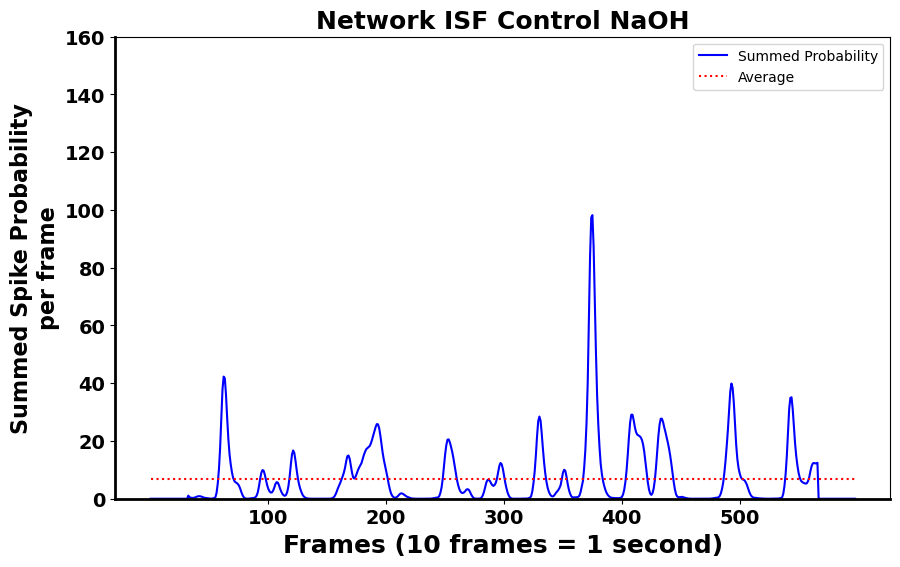

In [131]:
#Network ISF for Single condition and networks -> for final graphs

#import file
data = pd.read_csv(r"C:\processing\charlotte HCO3 NaOH exp\240329 HCO vs NaOH Cys toxicity pH 7.2\prediction_files\Hibernate_baseline\naoh_pre-240329_wtRt_DIV15_C1403_100k_bc_10x_HA_pre_well005_prediction.csv")

#get column sums
all_data = pd.concat([data], axis=0) #create pd dataframe
total_column_sums = all_data.sum() #calculate total column sums
average = total_column_sums.mean() #average total column sums

#plt figure as line plot
plt.figure(figsize=(10, 6))  
total_column_sums.plot(kind='line', linestyle='-', color='blue')  # Create a line plot
plt.plot(total_column_sums.index, [average] * len(total_column_sums), linestyle=':', color='red', label='Average')
plt.title('Network ISF Control NaOH', fontweight='bold', fontsize=18) 
plt.xlabel('Frames (10 frames = 1 second)', fontweight='bold', fontsize=18) 
plt.xticks([100, 200, 300, 400, 500], fontweight='bold', fontsize=14)
plt.ylabel('Summed Spike Probability\nper frame', fontweight='bold', fontsize=16)
plt.yticks(fontweight='bold', fontsize=14)
plt.ylim([0, 160]) #set y axis the same
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.legend(['Summed Probability', 'Average'])
plt.show()

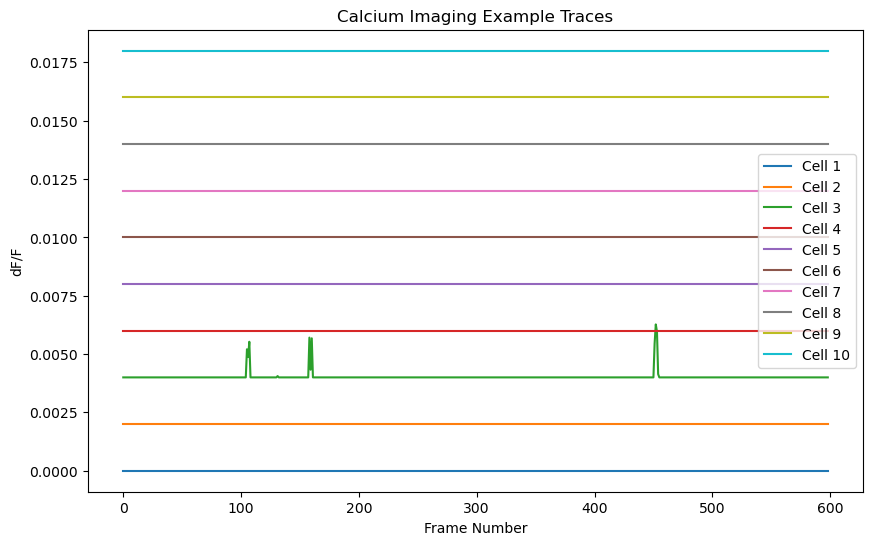

In [200]:
# single cell prediction graph for 10 cells-> DO NOT use
# Plt Prediction traces as a function try 1
def plot_prediction_traces(data, offset=0.002):
    """
    Plots each row of the data on a separate y-offset.
    Args:
    - data: 2D numpy array, where each row is a trace to plot
    - offset: The offset to apply between each trace
    """
    plt.figure(figsize=(10, 6))

    # Plot each trace, offsetting each by a constant amount
    for i, trace in enumerate(data):
        plt.plot(trace + i * offset, label=f'Cell {i+1}')

    plt.xlabel('Frame Number')
    plt.ylabel('dF/F')
    plt.title('Calcium Imaging Example Traces')
    plt.legend()
    plt.show()

# Call the function to plot the traces
sample = data.sample(n=10, random_state=42)

plot_prediction_traces(sample.values)



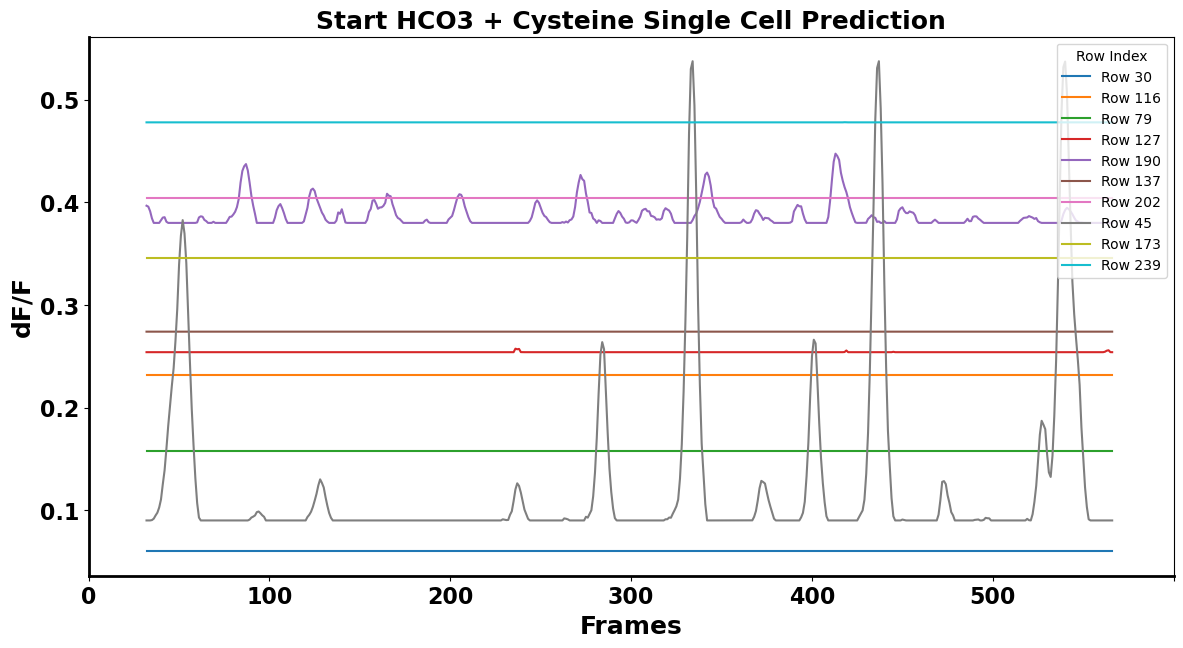

In [123]:
#Single Cell ISF for one condition for 10 cells (BEST Graph for now) -> not for final graphs
#use predictons file

#import file
data = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\start\experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well004_prediction.csv')

#Randomly select 10 rows from the DataFrame for plotting
random_rows = data.sample(n=10, random_state=42)  #'random_state' for reproducibility

plt.figure(figsize=(14, 7))

#plot each row as a separate line in a line plot
offset = 0.002

#create plot for every cell (10 cells in same plot)
for index, row in random_rows.iterrows():
    plt.plot(row.index, row.values + index * offset, linestyle='-', label=f'Row {index}') #marker='o' just row_values for displaying it without offset
plt.title('Start HCO3 + Cysteine Single Cell Prediction', fontweight='bold', fontsize=18)
plt.xlabel('Frames', fontweight='bold', fontsize=18)
plt.xticks([0, 100, 200, 300, 400, 500, 600], fontweight='bold', fontsize=16)
plt.yticks(fontweight='bold', fontsize=16)
#plt.ylim([0, 1.6])
plt.ylabel('dF/F', fontweight='bold', fontsize=18)
plt.legend(title='Row Index')
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.show()

#we want to set y axis to 1_10 (fixed scale bar) for each cell as a like cell count value and right next to graph a separate scale bar 
#maybe the distance between the graphs is too wide, especially on the top

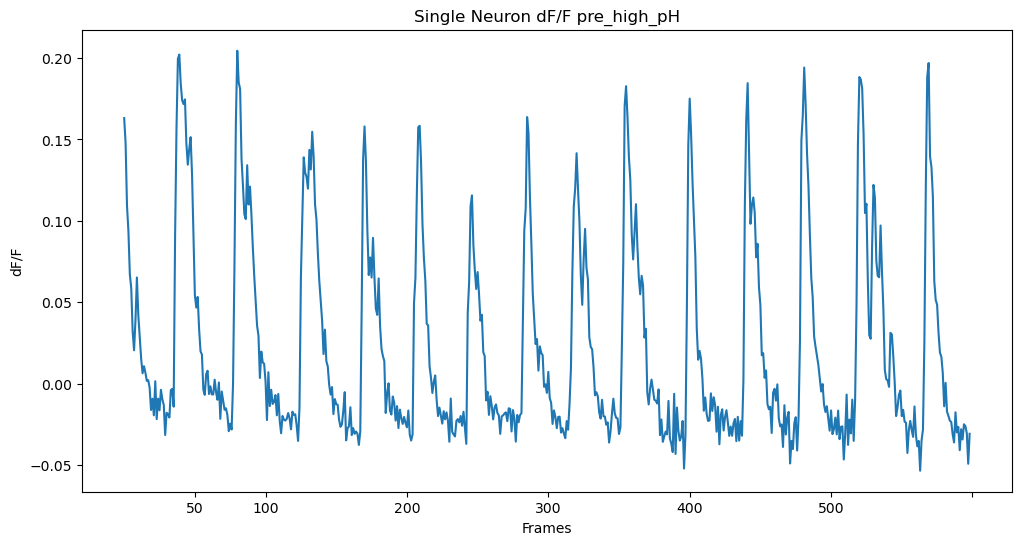

In [42]:
#deltaF Single Cell graph -> not for final graphs
# -> use delta F file
#Neuron 44 high_pH (row 44)

#get file
data = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\df_high_pH_Well3.csv')

#Check if the specified row index exists in the DataFrame
if 44 < len(data):
    # Extract the specific row (row 44)
    row_data = data.iloc[44]

    #Create a plot
    plt.figure(figsize=(12, 6))
    plt.plot(row_data.index, row_data.values, linestyle='-')  # Line plot
    plt.title('Single Neuron dF/F pre_high_pH')
    plt.xlabel('Frames')
    plt.ylabel('dF/F')
    plt.xticks([100, 200, 300, 400, 500, 600]) #Set specific y-axis ticks
    plt.show()
else:
    print(f"Row 44 does not exist. The DataFrame only has {len(data)} rows.")

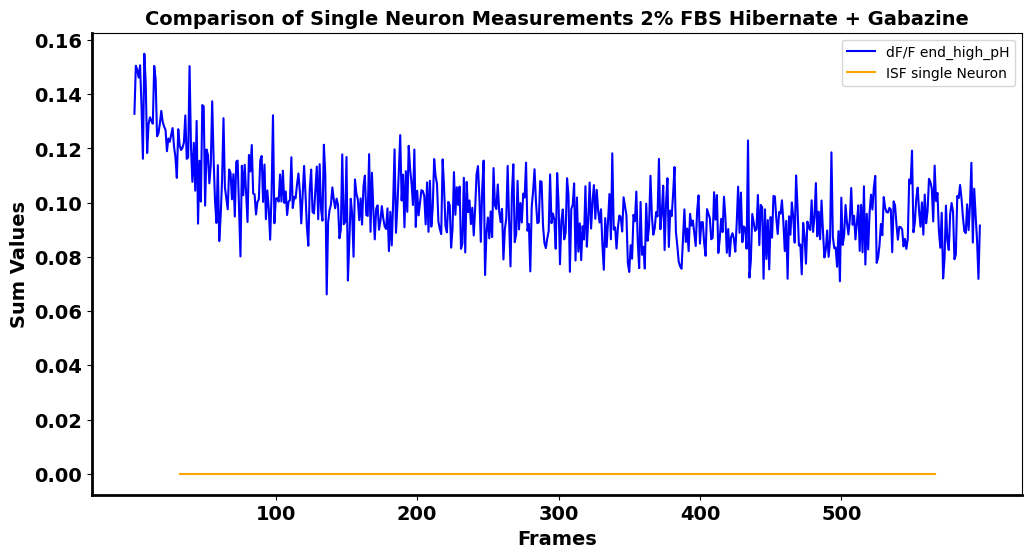

In [78]:
#Plotting dF/F and ISF together just like CASCADE Figure -> not for final graphs
#Graph 6

#Load the datasets
data1 = pd.read_csv(r"D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_deltaF_files\deltaF_2F_G_3.csv")
data2 = pd.read_csv(r"D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_2FBS_Gaba_3.csv")

#Check if the specified row index exists in both DataFrames
if 44 < len(data1) and 44 < len(data2):
    #Extract the specific row (row 44) from both DataFrames
    row_data1 = data1.iloc[44]
    row_data2 = data2.iloc[44]

    #modified_row_data2 = row_data2.iloc[32:-32]  # This slices the data to exclude the first and last 32 elements
    
    vertical_shift = 0.1  # Adjust this value as needed to shift the blue graph
    #horizontal_shift = 10

    #Create a plot
    plt.figure(figsize=(12, 6))
    
    #Plot data from the first DataFrame
    plt.plot(row_data1.index, row_data1.values + vertical_shift, linestyle='-', color='blue', label='dF/F end_high_pH')
    
    #Plot data from the second DataFrame
    plt.plot(row_data2.index, row_data2.values, linestyle='-', color='orange', label='ISF single Neuron')
    
    #create plot
    plt.title('Comparison of Single Neuron Measurements 2% FBS Hibernate + Gabazine', fontweight='bold', fontsize=14)
    plt.xlabel('Frames', fontsize=14)
    plt.ylabel('Measurement', fontsize=14)
    plt.xticks([100, 200, 300, 400, 500], fontweight='bold',fontsize=14)
    plt.xlabel('Frames', fontweight='bold',fontsize=14)
    plt.ylabel('Sum Values', fontweight='bold', fontsize=14)
    #plt.ylim([-0.1, 0.200])
    plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
    plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
    plt.yticks(fontweight='bold', fontsize=14)
    plt.legend()
    plt.show()
    
else:
    print(f"Row 44 does not exist in one or both DataFrames. Data1 has {len(data1)} rows, Data2 has {len(data2)} rows.")

The CSV file C:\processing\charlotte HCO3 NaOH exp\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\bicarbonate_acute\predictions_deltaF_nbic_ncys_2.csv has 905 rows with values.
The CSV file C:\processing\charlotte HCO3 NaOH exp\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\bicarbonate_acute\predictions_deltaF_nbic_ncys_3.csv has 394 rows with values.
The CSV file C:\processing\charlotte HCO3 NaOH exp\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\bicarbonate_acute\predictions_deltaF_nbic_ncys_1.csv has 325 rows with values.
The CSV file C:\processing\charlotte HCO3 NaOH exp\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\bicarbonate_acute\predictions_deltaF_nbic_cys_1.csv has 730 rows with values.
The CSV file C:\processing\charlotte HCO3 NaOH exp\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\bicarbonate_acute\predictions_deltaF_nbic_cys_2.csv has 719 rows with values.
The CSV file C:\processing\charlotte 

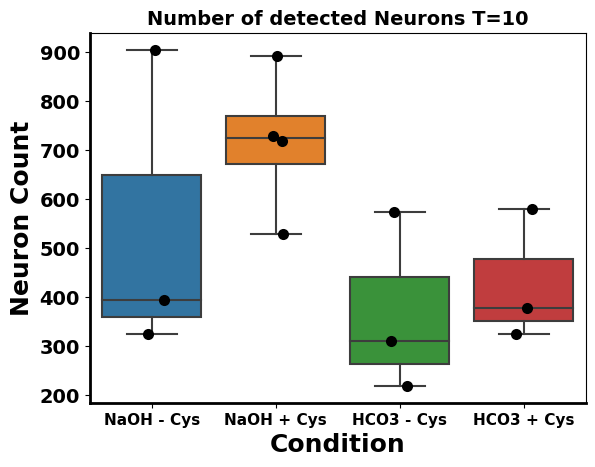

In [161]:
#Number of detected Neurons Graph boxplot -> for final graphs
#use overview file
import csv

#create base directory and get file names
base_dir = r'C:\processing\charlotte HCO3 NaOH exp\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\bicarbonate_acute'

file_names = [
    base_dir + '\\predictions_deltaF_nbic_ncys_2.csv',
    base_dir + '\\predictions_deltaF_nbic_ncys_3.csv',
    base_dir + '\\predictions_deltaF_nbic_ncys_1.csv',
    base_dir + '\\predictions_deltaF_nbic_cys_1.csv',
    base_dir + '\\predictions_deltaF_nbic_cys_2.csv',
    base_dir + '\\predictions_deltaF_nbic_cys_3.csv',
    base_dir + '\\predictions_deltaF_nbic_cys_4.csv',
    base_dir + '\\predictions_deltaF_bic_ncys_2.csv',
    base_dir + '\\predictions_deltaF_bic_ncys_3.csv',
    base_dir + '\\predictions_deltaF_bic_ncys_4.csv',
    base_dir + '\\predictions_deltaF_bic_cys_1.csv',
    base_dir + '\\predictions_deltaF_bic_cys_4.csv',
    base_dir + '\\predictions_deltaF_bic_cys_3.csv',
]

#counting rows with values in csv to use for plotting (rows = one cell detected)
def count_rows_with_values(file_path):
    with open(file_path, 'r') as csvfile: #open csv
        reader = csv.reader(csvfile) #read csv
        rows_with_values = 0 #value should be greater than 0
        for row in reader:
            if any(field.strip() for field in row):
                rows_with_values += 1
    return rows_with_values
for file_name in file_names:
    num_rows = count_rows_with_values(file_name) #count rows with values
    print(f"The CSV file {file_name} has {num_rows} rows with values.") #print counted rows in csv file

#set condition to each datapoint to assign to each value a sample
data = {
    'Condition': [ 'NaOH - Cys', 'NaOH - Cys', 'NaOH - Cys', 'NaOH + Cys','NaOH + Cys','NaOH + Cys', 'NaOH + Cys', #conditions to assign values for
                  'HCO3 - Cys', 'HCO3 - Cys', 'HCO3 - Cys', 'HCO3 + Cys', 'HCO3 + Cys', 'HCO3 + Cys'],
    'Value': [905, 394, 325, 730, 719, 893, 529, 310, 574, 219, 580, 325, 378]} #rows counted in csv

df = pd.DataFrame(data)

#create boxplotplot
sns.boxplot(x='Condition', y='Value', data=df)
sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True)
means = df.groupby('Condition')['Value'].mean().reset_index()
plt.title('Number of detected Neurons T=10', fontweight='bold', fontsize=14)
plt.xlabel('Condition', fontweight='bold', fontsize=18)
plt.ylabel('Neuron Count', fontweight='bold', fontsize=18)
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
#plt.ylim([0, 850])
plt.yticks(fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold', fontsize=11)
plt.show()

{'Condition': ['NaOH - Cys', 'NaOH - Cys', 'NaOH - Cys', 'NaOH + Cys', 'NaOH + Cys', 'NaOH + Cys', 'HCO3 - Cys', 'HCO3 - Cys', 'HCO3 - Cys', 'HCO3 + Cys', 'HCO3 + Cys', 'HCO3 + Cys'], 'Value': [0.5517241379310345, 7.377777777777778, 6.896551724137931, 2.5945945945945947, 2.590909090909091, 5.25, 2.975609756097561, 2.0555555555555554, 7.125, 1.0, 3.0232558139534884, 5.793103448275862]}


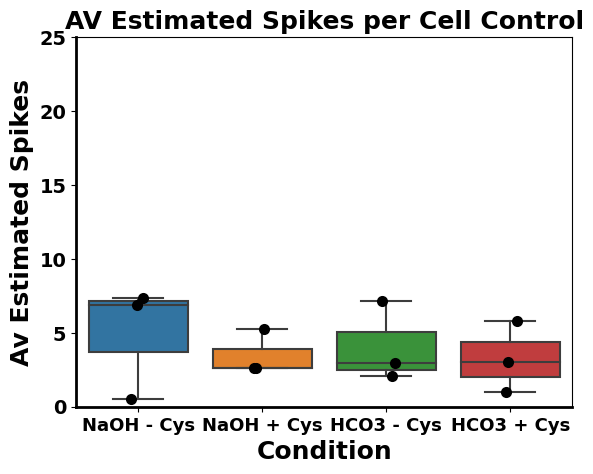

In [159]:
#Average Spikes per Cell Graph boxplot -> for final graphs
#use overview file

#get datafile (overview file shouldd be changed to prediction -> change code for that)
data = pd.read_csv(r"D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\overview.csv") #use overview file from processing, maybe switch to prediction files here too

data = {
    'Condition': [ 'NaOH - Cys', 'NaOH - Cys', 'NaOH - Cys', 'NaOH + Cys','NaOH + Cys', 'NaOH + Cys', 'HCO3 - Cys', 'HCO3 - Cys', 'HCO3 - Cys', 'HCO3 + Cys', 'HCO3 + Cys', 'HCO3 + Cys'], #conditions to assign values for
    'Value': [29+ 45 + 58 / 16 + 332 + 400, 
     44 + 56 + 41 / 96 + 294 + 122, 
    37 + 36 + 40 / 41 + 74 + 285, 
    48 + 43 + 29 / 48 + 130 + 168] #divide detected cells by Est. Spikes out of csv file, get cell number from graph "Detected Numbers of Neurons"
}

#print the data
print(data)

#create dataframe
df = pd.DataFrame(data)

#create boxplot
sns.boxplot(x='Condition', y='Value', data=df)
sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True)
means = df.groupby('Condition')['Value'].mean().reset_index() #plt means
plt.title('AV Estimated Spikes per Cell Control', fontweight='bold', fontsize=18)
plt.xlabel('Condition', fontweight='bold', fontsize=18)
plt.ylabel('Av Estimated Spikes', fontweight='bold', fontsize=18)
plt.ylim([0, 25])
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.yticks(fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold', fontsize=13)
plt.show()

       Value   Condition
0   2.201896  NaOH - Cys
1   1.932795  NaOH - Cys
2   2.779119  NaOH - Cys
3   3.104919  NaOH + Cys
4   3.520543  NaOH + Cys
5   2.708843  NaOH + Cys
6   2.300119  HCO3 - Cys
7   2.609808  HCO3 - Cys
8   3.172350  HCO3 - Cys
9   2.284651  HCO3 + Cys
10  3.425329  HCO3 + Cys
11  2.843323  HCO3 + Cys


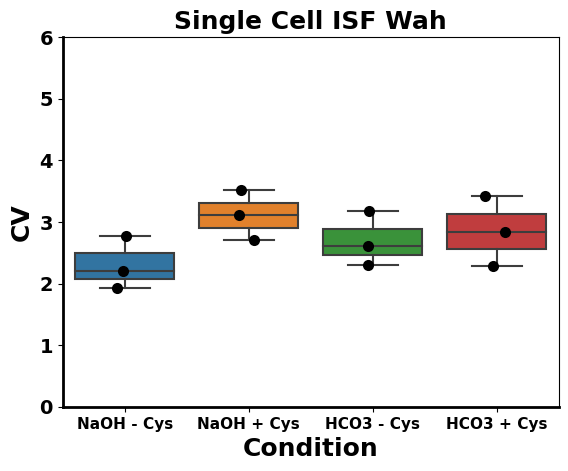

In [17]:
#Single Cell ISF boxplot graph -> for final graphs

#get data files (here pH 7.6 Cys relationship)
data1 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240329 HCO vs NaOH Cys toxicity pH 7.2\prediction_files\hibernate_washout\naoh_wash-240329_wtRt_DIV15_C1403_100k_bc_10x_washout_well001_prediction.csv')
data2 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240329 HCO vs NaOH Cys toxicity pH 7.2\prediction_files\hibernate_washout\naoh_wash-240329_wtRt_DIV15_C1403_100k_bc_10x_washout_well005_prediction.csv')
data3 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240329 HCO vs NaOH Cys toxicity pH 7.2\prediction_files\hibernate_washout\naoh_wash-240329_wtRt_DIV15_C1403_100k_bc_10x_washout_well009_prediction.csv')
data4 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240329 HCO vs NaOH Cys toxicity pH 7.2\prediction_files\hibernate_washout\naoh_cys_wash-240329_wtRt_DIV15_C1403_100k_bc_10x_washout_well002_prediction.csv')
data5 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240329 HCO vs NaOH Cys toxicity pH 7.2\prediction_files\hibernate_washout\naoh_cys_wash-240329_wtRt_DIV15_C1403_100k_bc_10x_washout_well006_prediction.csv')
data6 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240329 HCO vs NaOH Cys toxicity pH 7.2\prediction_files\hibernate_washout\naoh_cys_wash-240329_wtRt_DIV15_C1403_100k_bc_10x_washout_well010_prediction.csv')
data7 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240329 HCO vs NaOH Cys toxicity pH 7.2\prediction_files\hibernate_washout\hco3_wash-240329_wtRt_DIV15_C1403_100k_bc_10x_washout_well004_prediction.csv')
data8 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240329 HCO vs NaOH Cys toxicity pH 7.2\prediction_files\hibernate_washout\hco3_wash-240329_wtRt_DIV15_C1403_100k_bc_10x_washout_well008_prediction.csv')
data9 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240329 HCO vs NaOH Cys toxicity pH 7.2\prediction_files\hibernate_washout\hco3_wash-240329_wtRt_DIV15_C1403_100k_bc_10x_washout_well012_prediction.csv')
data10 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240329 HCO vs NaOH Cys toxicity pH 7.2\prediction_files\hibernate_washout\hco3_cys_wash-240329_wtRt_DIV15_C1403_100k_bc_10x_washout_well003_prediction.csv')
data11 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240329 HCO vs NaOH Cys toxicity pH 7.2\prediction_files\hibernate_washout\hco3_cys_wash-240329_wtRt_DIV15_C1403_100k_bc_10x_washout_well007_prediction.csv')
data12 = pd.read_csv(r'C:\processing\charlotte HCO3 NaOH exp\240329 HCO vs NaOH Cys toxicity pH 7.2\prediction_files\hibernate_washout\hco3_cys_wash-240329_wtRt_DIV15_C1403_100k_bc_10x_washout_well011_prediction.csv')

#create a dataframe
dataframes = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12]
ratios = []

#set condition for each file for later plotting
#here: 4 conditons. 2 w/o Cys, 1 NaOH and 1 Bicarbonate
conditions = ['NaOH - Cys', 'NaOH - Cys','NaOH - Cys', 'NaOH + Cys', 'NaOH + Cys', 'NaOH + Cys', 'HCO3 - Cys','HCO3 - Cys',
                  'HCO3 - Cys', 'HCO3 + Cys', 'HCO3 + Cys','HCO3 + Cys']

#calculate mean for each row and add a new colum average / row std and add new column
#then calculate overall mean /std. -> devide overall std by overall mean for calculation ratio
for df in dataframes:
    df['average'] = df.apply(lambda row: row.mean(), axis=1)
    df['std_dev'] = df.apply(lambda row: row.std(), axis=1)
    overall_average = df['average'].mean()
    overall_std_dev = df['std_dev'].mean()
    overall_ratio = overall_std_dev / overall_average
    ratios.append(overall_ratio) #append ratio to ratio list

#create dataframe with values and set conditions
df = pd.DataFrame({'Value': ratios, 'Condition': conditions})

print(df)

#create a boxplot
sns.boxplot(x='Condition', y='Value', data=df)
sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True) #for showing individual datapoints
plt.title('Single Cell ISF Wah', fontsize=18, fontweight='bold')
plt.xlabel('Condition', fontsize=18, fontweight='bold')
#plt.ylabel('Overall Ratio', fontsize=18, fontweight='bold')
plt.ylabel('CV', fontweight='bold', fontsize=18)
plt.ylim([0, 6]) #lim y axis to have same axis in all graphs
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.yticks(fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold', fontsize=11)
plt.show()